In [1]:
# Them thu vien

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import keras

np.random.seed(2)
%matplotlib inline

In [2]:
# Nhap data

data = pd.read_csv('creditcard.csv')

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

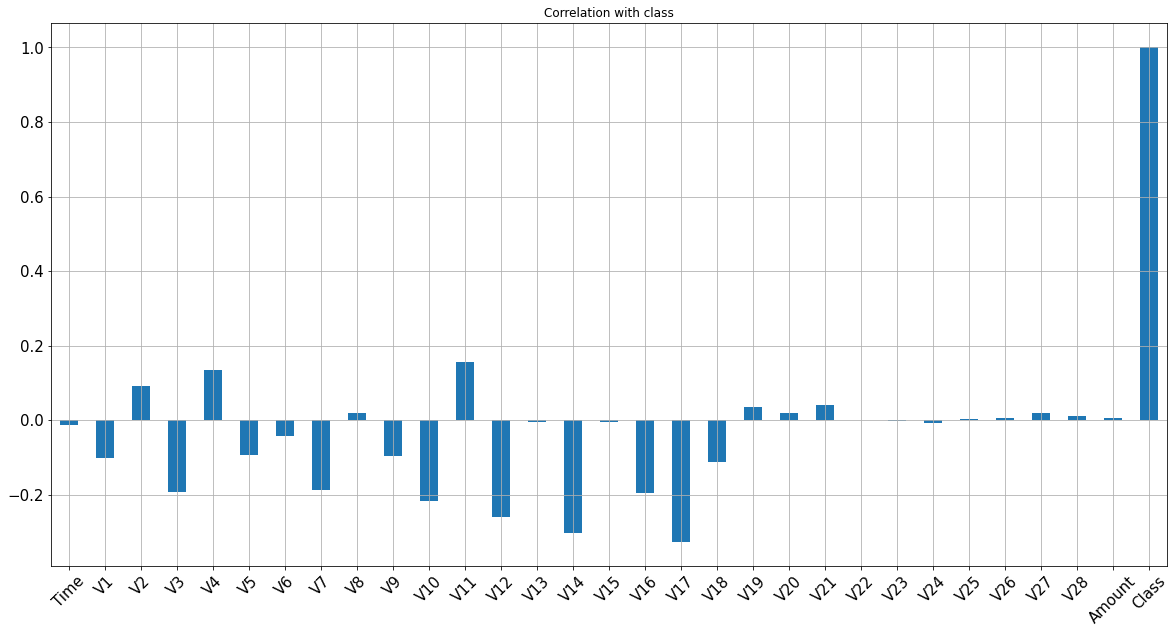

In [3]:
# Tong quan ve data

data.info()
data.corrwith(data.Class).plot.bar(figsize = (20, 10), title = "Correlation with class", fontsize = 15, rot = 45, grid = True)

In [4]:
# Ma tran tuong quan

sn.set(style="white")

# Tinh ma tran tuong quan

corr = data.corr()
corr.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447


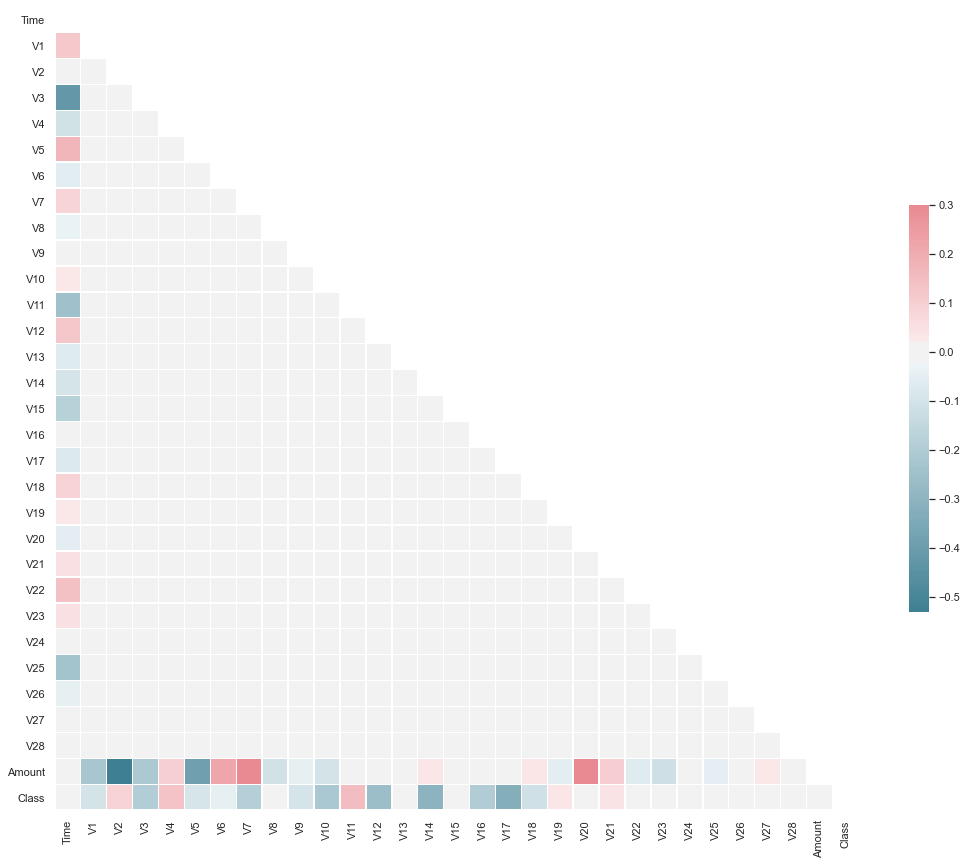

In [5]:
# Tao hinh tam giac tren

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Thiet lap hinh dang matplotlib

f, ax = plt.subplots(figsize=(18, 15))

# Tao so do mau phan ra tuy chinh

cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Ve so do

sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [6]:
# Kiem tra du lieu bi thieu

data.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [7]:
# Chia dac trung theo trinh do

from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)
data = data.drop(['Time'],axis=1)
data.head()

X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

X.info()
y.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   V1                284807 non-null  float64
 1   V2                284807 non-null  float64
 2   V3                284807 non-null  float64
 3   V4                284807 non-null  float64
 4   V5                284807 non-null  float64
 5   V6                284807 non-null  float64
 6   V7                284807 non-null  float64
 7   V8                284807 non-null  float64
 8   V9                284807 non-null  float64
 9   V10               284807 non-null  float64
 10  V11               284807 non-null  float64
 11  V12               284807 non-null  float64
 12  V13               284807 non-null  float64
 13  V14               284807 non-null  float64
 14  V15               284807 non-null  float64
 15  V16               284807 non-null  float64
 16  V17               28

,Class
0,0
1,0
2,0
3,0
4,0


In [8]:
# Train mau

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0, criterion = 'gini',  splitter='best', min_samples_leaf=1, min_samples_split=2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Decision tree', acc, prec, rec, f1]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100, criterion = 'entropy')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
results

<ipython-input-8-ad2887caa61e>:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.999333,0.835821,0.761905,0.797153
1,Random Forest (n=100),0.999520,0.941667,0.768707,0.846442


In [9]:
# Mo hinh mang neural

# Them thu vien keras va cac goi

import keras
from keras.models import Sequential
from keras.layers import Dense

# Khoi tao mang luoi

classifier = Sequential()
classifier.add(Dense(units =15 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 29))
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Phu hop mang luoi vao tap train

classifier.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
6231/6231 [==============================] - 5s 739us/step - loss: 0.0148 - accuracy: 0.9983
Epoch 2/100
6231/6231 [==============================] - 5s 725us/step - loss: 0.0032 - accuracy: 0.9993
Epoch 3/100
6231/6231 [==============================] - 5s 742us/step - loss: 0.0028 - accuracy: 0.9994
Epoch 4/100
6231/6231 [==============================] - 5s 733us/step - loss: 0.0027 - accuracy: 0.9994
Epoch 5/100
6231/6231 [==============================] - 5s 751us/step - loss: 0.0026 - accuracy: 0.9994
Epoch 6/100
6231/6231 [==============================] - 5s 740us/step - loss: 0.0026 - accuracy: 0.9994
Epoch 7/100
6231/6231 [==============================] - 5s 740us/step - loss: 0.0025 - accuracy: 0.9994
Epoch 8/100
6231/6231 [==============================] - 5s 736us/step - loss: 0.0025 - accuracy: 0.9994
Epoch 9/100
6231/6231 [==============================] - 5s 773us/step - loss: 0.0024 - accuracy: 0.9995
Epoch 10/100
6231/6231 [==============================]

In [10]:
# Du doan ket qua tap thu

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

score = classifier.evaluate(X_test, y_test)
score

2671/2671 [==============================] - 2s 570us/step - loss: 0.0069 - accuracy: 0.9994


[0.006930388510227203, 0.9993562698364258]

In [11]:
# Tao ma tran hon loan

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[85271,    25],
       [   30,   117]], dtype=int64)

In [12]:
# Xem mau duoc train

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.82      0.80      0.81       147

    accuracy                           1.00     85443
   macro avg       0.91      0.90      0.90     85443
weighted avg       1.00      1.00      1.00     85443



Test Data Accuracy: 0.9994


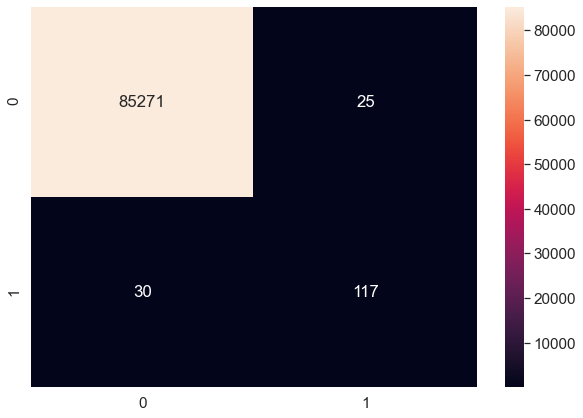

In [13]:
# Ma tran hon loan

cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))